# Setup

## Import library

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [31]:
from sklearn.utils import resample

# Data preprocessing

## Load dataset

In [32]:
# dataset bias
df1 = pd.read_json("https://raw.githubusercontent.com/Zaniiiii/Data/main/pukul6/bias/clean/dataset_bias_cnn_clean.json",lines=True)
df2 = pd.read_json("https://raw.githubusercontent.com/Zaniiiii/Data/main/pukul6/bias/clean/dataset_bias_kompas_clean.json",lines=True)
df3 = pd.read_json("https://raw.githubusercontent.com/Zaniiiii/Data/main/pukul6/bias/clean/dataset_bias_suara_clean.json",lines=True)
df4 = pd.read_json("https://raw.githubusercontent.com/Zaniiiii/Data/main/pukul6/bias/clean/dataset_bias_detik_clean.json",lines=True)
df5 = pd.read_json("https://raw.githubusercontent.com/Zaniiiii/Data/main/pukul6/bias/clean/dataset_bias_tribun_clean.json",lines=True)

In [33]:
df1

,gabung,bias
0,cnn prabowo subianto temu jokowi istana sore,0
1,cnn klaim pkb jakarta warga komplain tinggal a...,0
2,cnn dpr selingkuh hakim bal kecewa cuek ma,0
3,cnn gibran maaf bagi buku sampul jan ethes,0
4,cnn habiburokhman marah sekjen mk rapat komisi...,0
...,...,...
95,cnn muhammadiyah sorot revisi uu tni polri ing...,0
96,cnn komisi dpr kemenhan gelar rapat tutup prab...,0
97,cnn majelis rakyat papua mekar kabupaten jokow...,0
98,cnn pdip dukung revisi uu tni usia pensiun fra...,0


In [34]:
df2

,gabung,bias
0,kompas jokowi seru rang judi online bentuk satgas,0
1,kompas megawati buku pdi sita sidik kpk isi,0
2,kompas manuver pkb pilkada jakarta dukung ahok...,0
3,kompas gaspol ft sekar tandjung solo lepas gib...,0
4,kompas staf hasto tiru benta sidik kpk diam,0
...,...,...
103,kompas dpr pasti prabowo hadir rapat komisi si...,0
104,kompas jokowi nanti air ngantor ikn presiden j...,0
105,kompas bamsoet pimpin parpol rasa milu brutal,0
106,kompas jokowi nilai gimik larang kaesang maju ...,0


In [35]:
df3

,gabung,bias
0,suara politis golkar jaro ade sulhajji jompa p...,1
1,suara waspada politik uang pilkada ppu serta d...,1
2,suara rekam jejak tsamara amany eks kader psi ...,0
3,suara mahasiswa klaim bukti kuat politik uang ...,0
4,suara hasto panggil kpk harun mas pukat ugm ag...,1
...,...,...
171,suara survei persepsi masyarakat kota yogyakar...,1
172,suara amat politik cilegon butuh sosok pilkada...,0
173,suara pilkada bontang drama politik pasang tah...,1
174,suara pakar politik pan hitung peluang bima ar...,1


In [36]:
df4

,gabung,bias
0,detik polisi tunggu tuju keluarga korban pesaw...,0
1,detik rs polri kondisi korban tewas pesawat ja...,0
2,detik jelas polri kemenhub pesawat latih jatuh...,0
3,detik pesawat latih jatuh bsd evakuasi pakai c...,0
4,detik duka lepas salim said sang tokoh pers na...,0
...,...,...
195,detik ramai cfd sudirman jakpus pagi warga kel...,0
196,detik ria sakit siswi smp bogor korban rundung...,0
197,detik ribu warga jangkit dbd dprd sorot aspek ...,0
198,detik pimpin komisi dpr kritik kemendikbud did...,0


In [37]:
df5

,gabung,bias
0,tribun gerindra respons kader ramai ramai komi...,1
1,tribun amat revisi uu md politis milik urgensi,1
2,tribun video wawancara eksklusif calon pimpin ...,0
3,tribun ramai buku gambar jan ethes gibran maaf...,0
4,tribun gibran kritik buku sampul jan ethes sur...,1
...,...,...
371,tribun plt kepala oikn rapat komisi lasarus se...,1
372,tribun komnas perempuan selenggara milu laku t...,1
373,tribun qodari buka buka konstelasi politik bic...,1
374,tribun respons istana buruh demo tolak tapera ...,1


In [38]:
df = pd.concat([df1, df2, df3, df4, df5], axis=0, ignore_index=True)

In [39]:
df

,gabung,bias
0,cnn prabowo subianto temu jokowi istana sore,0
1,cnn klaim pkb jakarta warga komplain tinggal a...,0
2,cnn dpr selingkuh hakim bal kecewa cuek ma,0
3,cnn gibran maaf bagi buku sampul jan ethes,0
4,cnn habiburokhman marah sekjen mk rapat komisi...,0
...,...,...
955,tribun plt kepala oikn rapat komisi lasarus se...,1
956,tribun komnas perempuan selenggara milu laku t...,1
957,tribun qodari buka buka konstelasi politik bic...,1
958,tribun respons istana buruh demo tolak tapera ...,1


## Check factual and fake news distribution

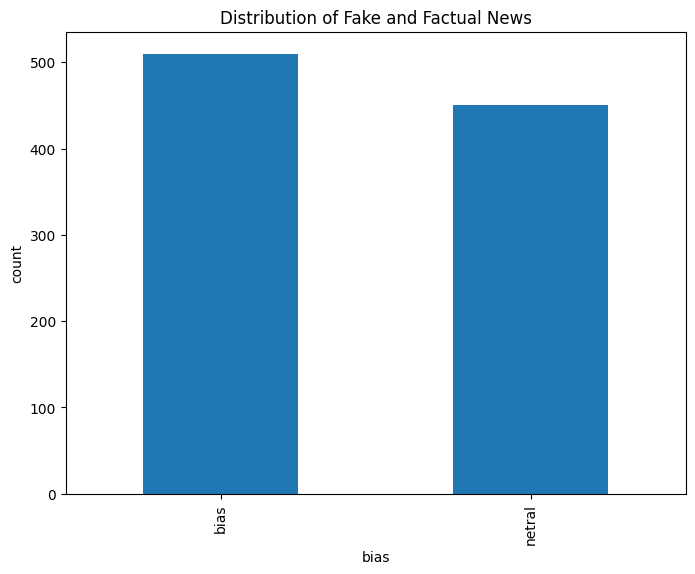

In [40]:
# count the occurrences of each class in 'is_fake'
count_classes = df['bias'].value_counts()

# plot the distribution as a bar chart
plt.figure(figsize=(8, 6))
count_classes.plot(kind='bar')
plt.title('Distribution of Fake and Factual News')
plt.xlabel('bias')
plt.ylabel('count')
plt.xticks(ticks=[0, 1], labels=['bias', 'netral'])
plt.show()

In [41]:
# Pisahkan data berdasarkan label 'bias'
df_bias_1 = df[df['bias'] == 1]
df_bias_0 = df[df['bias'] == 0]

# Tentukan jumlah minimum antara kedua label untuk memastikan keseimbangan 50/50
min_count = min(len(df_bias_1), len(df_bias_0))

# Resample data untuk menyeimbangkan kedua label
df_bias_1_resampled = resample(df_bias_1, replace=False, n_samples=min_count, random_state=42)
df_bias_0_resampled = resample(df_bias_0, replace=False, n_samples=min_count, random_state=42)

# Gabungkan kembali data yang telah diresample
df_balanced = pd.concat([df_bias_1_resampled, df_bias_0_resampled])

# Opsional: Acak urutan baris untuk memastikan distribusi yang merata
df = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Tampilkan DataFrame yang sudah seimbang
df

,gabung,bias
0,tribun kelakar zulhas umum cakada insyaallah m...,1
1,cnn komisi dpr kemenhan gelar rapat tutup prab...,0
2,suara terang terang bela dinasti politik host ...,1
3,kompas upacara agustus jokowi prabowo ikn ma r...,0
4,tribun syafrudin budiman usul wamen ketenagake...,1
...,...,...
895,tribun jokowi pimpin ingat hut ri ikn wapres j...,1
896,suara pakar politik pan hitung peluang bima ar...,1
897,tribun amien rais usul presiden pilih mpr pdip...,0
898,suara total politik sorot momen rocky gerung w...,1


## Check median & mean news words

In [42]:
# add a column for the word count
df['word_count'] = df['gabung'].apply(lambda x: len(str(x).split()))

# calculate the median word count for each label
median_word_count_label_0 = df[df['bias'] == 0]['word_count'].median()
median_word_count_label_1 = df[df['bias'] == 1]['word_count'].median()

median_word_count_label_0, median_word_count_label_1

(12.5, 15.5)

In [43]:
# calculate the median word count for each label
mean_word_count_label_0 = df[df['bias'] == 0]['word_count'].mean()
mean_word_count_label_1 = df[df['bias'] == 1]['word_count'].mean()

mean_word_count_label_0, mean_word_count_label_1

(84.68666666666667, 98.23555555555555)

In [44]:
# function to balance the dataset by undersampling
def balance_dataset(df, target_column, text_column):
    mean_word_count_label_0 = df[df[target_column] == 0]['word_count'].mean()
    mean_word_count_label_1 = df[df[target_column] == 1]['word_count'].mean()

    # continue to remove samples from label 0 until balanced
    while mean_word_count_label_0 > mean_word_count_label_1 + 1:  # plus 1 to avoid infinite loop due to rounding errors
        difference = mean_word_count_label_0 - mean_word_count_label_1
        samples_to_remove = df[(df[target_column] == 0) & (df['word_count'] > mean_word_count_label_1)]
        num_samples_to_remove = int(difference * len(samples_to_remove) / mean_word_count_label_0)
        indices_to_remove = np.random.choice(samples_to_remove.index, num_samples_to_remove, replace=False)
        df = df.drop(indices_to_remove)

        # recalculate the mean word count for each label
        mean_word_count_label_0 = df[df[target_column] == 0]['word_count'].mean()
        mean_word_count_label_1 = df[df[target_column] == 1]['word_count'].mean()

    return df

# balance the dataset
df_balanced = balance_dataset(df, target_column='bias', text_column='title')

# Print new mean word counts
new_mean_word_count_label_0 = df_balanced[df_balanced['bias'] == 0]['word_count'].mean()
new_mean_word_count_label_1 = df_balanced[df_balanced['bias'] == 1]['word_count'].mean()

new_mean_word_count_label_0, new_mean_word_count_label_1

(84.68666666666667, 98.23555555555555)

In [45]:
df = df_balanced

In [46]:
# calculate the length of each text and add it as a new column
df['text_length'] = df['gabung'].apply(len)

# find the average text length
average_length = df['text_length'].median()

print("Average text length: {:.2f}".format(average_length))

Average text length: 94.00


In [47]:
df

,gabung,bias,word_count,text_length
0,tribun kelakar zulhas umum cakada insyaallah m...,1,202,1343
1,cnn komisi dpr kemenhan gelar rapat tutup prab...,0,9,55
2,suara terang terang bela dinasti politik host ...,1,239,1504
3,kompas upacara agustus jokowi prabowo ikn ma r...,0,11,68
4,tribun syafrudin budiman usul wamen ketenagake...,1,68,456
...,...,...,...,...
895,tribun jokowi pimpin ingat hut ri ikn wapres j...,1,9,52
896,suara pakar politik pan hitung peluang bima ar...,1,205,1291
897,tribun amien rais usul presiden pilih mpr pdip...,0,155,1021
898,suara total politik sorot momen rocky gerung w...,1,74,485


## Create Tokenizer

In [48]:
# separating features and labels
X = df['gabung'].values
y = df['bias'].values

In [49]:
# Create tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)

# Converting text to numeric squences
sequences = tokenizer.texts_to_sequences(X)

# Padding the squences
padded_sequences = pad_sequences(sequences, maxlen=30, padding='post', truncating='post')

## Split dataset for training

In [50]:
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

# Create Model

## Import library

In [51]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GlobalAveragePooling1D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam, RMSprop, Nadam, AdamW
from tensorflow.keras.regularizers import l1_l2

## Create LSTM model

In [52]:
# create model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=64, input_length=30))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32, return_sequences=True, kernel_regularizer=l1_l2(l1=0.01, l2=0.01))))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(16, return_sequences=True, kernel_regularizer=l1_l2(l1=0.01, l2=0.01))))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(GlobalAveragePooling1D())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(optimizer=AdamW(learning_rate=0.001, weight_decay=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# set up early stopping and reduce learning rate
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# model training
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_test, y_test),
                    batch_size=64,
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
12/12 [==============================] - 13s 255ms/step - loss: 26.0599 - accuracy: 0.5028 - val_loss: 24.2772 - val_accuracy: 0.4944 - lr: 0.0010
Epoch 2/50
12/12 [==============================] - 1s 106ms/step - loss: 23.3813 - accuracy: 0.5333 - val_loss: 21.7125 - val_accuracy: 0.4944 - lr: 0.0010
Epoch 3/50
12/12 [==============================] - 1s 102ms/step - loss: 20.7950 - accuracy: 0.5458 - val_loss: 19.3342 - val_accuracy: 0.4944 - lr: 0.0010
Epoch 4/50
12/12 [==============================] - 1s 119ms/step - loss: 18.4498 - accuracy: 0.5847 - val_loss: 17.1319 - val_accuracy: 0.4944 - lr: 0.0010
Epoch 5/50
12/12 [==============================] - 1s 71ms/step - loss: 16.2523 - accuracy: 0.6208 - val_loss: 15.1046 - val_accuracy: 0.4944 - lr: 0.0010
Epoch 6/50
12/12 [==============================] - 1s 80ms/step - loss: 14.2211 - accuracy: 0.6694 - val_loss: 13.2473 - val_accuracy: 0.4944 - lr: 0.0010
Epoch 7/50
12/12 [==============================] - 1s 71ms

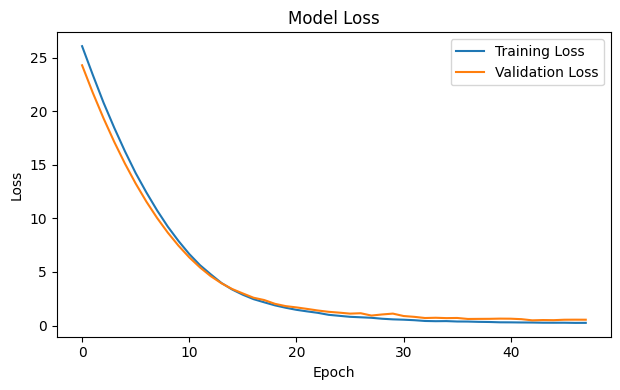

In [53]:
# training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')


plt.tight_layout()
plt.show()

## Evaluate and save model

In [54]:
import pickle

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Save the model with HDF5 format
model.save('bias_detection_lstm.h5')

# Save the model with pickle format
with open('bias_tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

6/6 [==============================] - 0s 7ms/step - loss: 0.4864 - accuracy: 0.9000
Test Accuracy: 90.00%


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Convert to TFLite

In [55]:
# Convert the model with Select TF ops
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False
tflite_model = converter.convert()

# Save the model
with open('bias_detection_lstm.tflite', 'wb') as f:
    f.write(tflite_model)

print('Model has been saved as TensorFlow Lite format.')

Model has been saved as TensorFlow Lite format.


# Download important files

# Testing

In [56]:
import pickle
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences

# Memuat Tokenizer dari file Pickle
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

# Memuat Model TFLite
interpreter = tf.lite.Interpreter(model_path='hoax_detection_lstm.tflite')
interpreter.allocate_tensors()

# Mendapatkan informasi tensor input dan output
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Teks baru yang ingin diprediksi
news_text = ["tribun Siapa Syafrudin Budiman? Diusulkan Jadi Wamen Ketenagakerjaan oleh Aliansi Relawan Prabowo TRIBUNNEWS.COM, JAKARTA - Pada Rabu (29\/5\/2024) Aliansi Relawan Prabowo Gibran (ARPG) merilis usulan 14 nama-nama calon menteri dan wakil menteri (wamen) untuk mengisi Kabinet Pemerintahan Prabowo Subianto-Gibran Rakabuming Raka 5 tahun ke depan Diantara 14 nama-nama tersebut ada nama yang masih terdengar asing yakni Syafrudin Budiman SIP yang diusulkan sebagai Wakil Menteri UKM dan Koperasi atau Wakil Menteri Ketenagakerjaan. Meskipun Gus Din, sapaan akrab Syafrudin Budiman, selama ini dikenal sebagai tokoh relawan dan menjadi Ketua Umum Presidium Pusat Barisan Pembaharuan (PP-BP). Gus Din aktif sebagai relawan sejak 2017 - 2024 mendukung Presiden Jokowi Widodo (Jokowi). Pada Pilpres 2024 dirinya aktif menjadi relawan Jokowi yang mendukung Prabowo - Gibran, tetap dengan bendera Relawan Barisan Pembaharuan 08. Sebagai mantan jurnalis, Gus Din juga aktif sebagai kader calon anggota legislatif PAN DPR RI Dapil DKI Jakarta II (Jaksel, Jakpus dan Luar Negeri) dari unsur tokoh masyarakat. Aktivis dan intelektual muda ini memiliki segudang pengalaman dalam organisasi pemuda, mahasiswa, ormas dan partai politik. Dia mengaku telah melewati banyak perkaderan sampai tingkat paripurna, terutama di Perkaderan Kepemudaan, Partai Politik dan Ormas Muhammadiyah. Syafrudin Budiman adalah pendiri dan Ketua Umum DPP Partai UKM Indonesia yang bermetamorfosa menjadi Perhimpunan UKM Indonesia. Sebagai bentuk dukungan kepada PAN, Gus Din bersama jajarannya pada 22 Juli 2022 menyatakan berfusi dan bergabung ke PAN yang dianggap bisa memperjuangkan kalangan UKM indonesia. Cicit Pahlawan Nasional yang juga Ketua Umum PB Muhammadiyah KH. Mas Mansur dan Cicit Ketua PBNU Pertama KH Hasan Basri (Hasan Gipo) ini dikenal sebagai pengusaha dan konsultan UMKM, Koperasi dan Perdagangan. Selain masih menjadi Ketua Umum Relawan Jokowi Barisan Pembaharuan (BP), Gus Din juga menjadi Ketua Dewan Pembina Relawan Erick Thohir (Relawan ETOR) dan Kordinator Nasional Aliansi Relawan Prabowo Gibran (ARPG). Pada saat Pilpres 2019, Gus Din pernah menjadi Koordinator Media Rumah Aspirasi Rakyat Jokowi-Amin 01 Jl Proklamasi 46 Menteng Jakarta Pusat"]

# Tokenisasi dan padding teks baru
new_sequences = tokenizer.texts_to_sequences(news_text)
max_len = 30  # Pastikan panjang maksimum sesuai dengan yang digunakan saat melatih model
new_padded = pad_sequences(new_sequences, maxlen=max_len)

# Konversi data input menjadi tipe float32
new_padded = new_padded.astype('float32')

# Mengatur tensor input dengan data yang dipadatkan
interpreter.set_tensor(input_details[0]['index'], new_padded)

# Menjalankan interpreter untuk membuat prediksi
interpreter.invoke()

# Mendapatkan hasil prediksi dari tensor output
predictions_tflite = interpreter.get_tensor(output_details[0]['index'])

# Menginterpretasikan hasil prediksi
predicted_labels_tflite = [1 if pred > 0.5 else 0 for pred in predictions_tflite]

# Menampilkan hasil prediksi
for text, pred, label in zip(news_text, predictions_tflite, predicted_labels_tflite):
    print(f'Text: {text}')
    print(f'Prediction: {pred[0]:.4f}')
    print(f'Predicted Label: {"Bias" if label == 1 else "Netral"}')

Text: tribun Siapa Syafrudin Budiman? Diusulkan Jadi Wamen Ketenagakerjaan oleh Aliansi Relawan Prabowo TRIBUNNEWS.COM, JAKARTA - Pada Rabu (29\/5\/2024) Aliansi Relawan Prabowo Gibran (ARPG) merilis usulan 14 nama-nama calon menteri dan wakil menteri (wamen) untuk mengisi Kabinet Pemerintahan Prabowo Subianto-Gibran Rakabuming Raka 5 tahun ke depan Diantara 14 nama-nama tersebut ada nama yang masih terdengar asing yakni Syafrudin Budiman SIP yang diusulkan sebagai Wakil Menteri UKM dan Koperasi atau Wakil Menteri Ketenagakerjaan. Meskipun Gus Din, sapaan akrab Syafrudin Budiman, selama ini dikenal sebagai tokoh relawan dan menjadi Ketua Umum Presidium Pusat Barisan Pembaharuan (PP-BP). Gus Din aktif sebagai relawan sejak 2017 - 2024 mendukung Presiden Jokowi Widodo (Jokowi). Pada Pilpres 2024 dirinya aktif menjadi relawan Jokowi yang mendukung Prabowo - Gibran, tetap dengan bendera Relawan Barisan Pembaharuan 08. Sebagai mantan jurnalis, Gus Din juga aktif sebagai kader calon anggota 